In [22]:
import rasterio
from rasterio.windows import Window

In [23]:
image = rasterio.open("top_potsdam_6_11_RGBIR.tif")

In [24]:
print(image.crs)
print(image.crs.wkt)

EPSG:32633
PROJCS["WGS 84 / UTM zone 33N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",15],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32633"]]


In [25]:
type(image)

rasterio.io.DatasetReader

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

from skimage.segmentation import watershed
from skimage.feature import peak_local_max

In [30]:
img = image.read([3, 2, 1])

In [31]:
type(img)

numpy.ndarray

In [17]:
img.shape

(3, 6000, 6000)

In [53]:
smallimage = image.read([3, 2, 1], window = Window(2744, 2744, 512, 513))

In [54]:
matplotlib_like = np.transpose(smallimage, [1, 2, 0])
matplotlib_like.shape

(513, 512, 3)

In [44]:
show(smallimage)

NameError: name 'show' is not defined

In [42]:
ws = watershed(img)

In [43]:
ws

array([[[      1,       1,       1, ...,     585,     585,     895],
        [      1,    1516,    1516, ...,    1216,     895,     895],
        [   1516,    1516,    1516, ...,    1216,    1216,     895],
        ...,
        [1800701, 1800701, 1800701, ..., 3006782, 3006782, 1801958],
        [1800701, 1802924, 1800701, ..., 3006782, 3006782, 1801958],
        [1802924, 1802924, 1802924, ..., 3006782, 3006782, 3006782]],

       [[      1,       1, 1809517, ..., 1809936, 1809936, 1809936],
        [      1, 1810519, 1810519, ..., 1809936, 1809936, 1809936],
        [   1516,    1516, 1810519, ..., 1810323, 1810323, 1810323],
        ...,
        [1800701, 1800701, 1800701, ..., 3006782, 3006782, 3006367],
        [1800701, 1802924, 1800701, ..., 3006782, 3006782, 3006367],
        [1802924, 1802924, 1802924, ..., 3006782, 3006782, 3006367]],

       [[1809517, 1809517, 1809517, ..., 1809936, 1809936, 1809936],
        [1809517, 1810519, 1810519, ..., 1809936, 1809936, 1809936],
    

In [45]:
ws2 = watershed(smallimage)

In [46]:
ws2

array([[[    1,     1,     1, ...,    48,    48,    98],
        [    1,     1,     1, ...,    73,    73,    98],
        [    1,     1,     1, ...,    73,    98,    98],
        ...,
        [13983, 13983, 13983, ..., 13982, 13982, 13982],
        [13983, 13983, 13983, ..., 13982, 13982, 13982],
        [13983, 13983, 13983, ..., 13982, 13982, 13982]],

       [[    1,     1,     1, ..., 14097, 14097, 14097],
        [    1,     1,     1, ..., 14097, 14097, 14118],
        [    1,     1,     1, ..., 14097, 14118, 14118],
        ...,
        [24564, 24564, 24485, ..., 24589, 24563, 24563],
        [24564, 24564, 24564, ..., 24589, 24563, 24563],
        [24564, 24564, 24564, ..., 24589, 24563, 24563]],

       [[    1,     1,     1, ..., 14097, 14097, 14097],
        [    1,     1,     1, ..., 14097, 14097, 14118],
        [    1,     1,     1, ..., 14097, 14118, 14118],
        ...,
        [24564, 24564, 24485, ..., 24589, 24563, 24563],
        [24564, 24564, 24564, ..., 24589, 245

In [61]:
transposedimage = np.transpose(ws2, [2, 1, 0])

In [62]:
transposedimage.shape

(512, 512, 3)

In [64]:
type(transposedimage)

numpy.ndarray

In [70]:
transposedimage

array([[[    1,     1,     1],
        [    1,     1,     1],
        [    1,     1,     1],
        ...,
        [13983, 24564, 24564],
        [13983, 24564, 24564],
        [13983, 24564, 24564]],

       [[    1,     1,     1],
        [    1,     1,     1],
        [    1,     1,     1],
        ...,
        [13983, 24564, 24564],
        [13983, 24564, 24564],
        [13983, 24564, 24564]],

       [[    1,     1,     1],
        [    1,     1,     1],
        [    1,     1,     1],
        ...,
        [13983, 24485, 24485],
        [13983, 24564, 24564],
        [13983, 24564, 24564]],

       ...,

       [[   48, 14097, 14097],
        [   73, 14097, 14097],
        [   73, 14097, 14097],
        ...,
        [13982, 24589, 24589],
        [13982, 24589, 24589],
        [13982, 24589, 24589]],

       [[   48, 14097, 14097],
        [   73, 14097, 14097],
        [   98, 14118, 14118],
        ...,
        [13982, 24563, 24563],
        [13982, 24563, 24563],
        [13982,

In [71]:
ras = transposedimage[0]

In [83]:
type(smallimage)

numpy.ndarray

In [100]:
rasterio.transform.xy (image.transform, 2744, 2744)

(367413.72500000003, 5807225.374999999)

In [101]:
image.transform

Affine(0.05, 0.0, 367276.5,
       0.0, -0.05, 5807362.6)

In [106]:
from rasterio import Affine
from rasterio import features
shps = features.shapes(ras, transform = Affine(0.05, 0.0, 367413.72500000003, 0.0, -0.05, 5807225.374999999))
records = []

In [109]:
type(records)

list

In [112]:
for id, shp in enumerate(shps):
    item = {'geometry': shp[0], 'id': id+1, 'properties': 
            OrderedDict([('dn', np.int(shp[1]))]),
            'type': 'Feature'}
    records.append(item)

In [117]:
from geopandas import GeoDataFrame

vec = GeoDataFrame.from_features(records)

In [119]:
vec.crs = transposedimage.crs

AttributeError: 'numpy.ndarray' object has no attribute 'crs'

In [120]:
vec

,geometry,dn
0,"POLYGON ((367413.725 5807225.374999999, 367413...",1
1,"POLYGON ((367413.725 5807225.224999999, 367413...",145
2,"POLYGON ((367413.775 5807224.874999999, 367413...",14225
3,"POLYGON ((367413.725 5807224.774999999, 367413...",14241
4,"POLYGON ((367413.725 5807224.674999999, 367413...",14293
5,"POLYGON ((367413.725 5807224.524999999, 367413...",610
6,"POLYGON ((367413.725 5807224.174999999, 367413...",732
7,"POLYGON ((367413.725 5807224.024999999, 367413...",784
8,"POLYGON ((367413.725 5807223.874999999, 367413...",1058
9,"POLYGON ((367413.725 5807223.524999999, 367413...",1092


In [121]:
vec.to_file("segmented.shp")

In [95]:
show(segmented.shp)

NameError: name 'show' is not defined

In [97]:
from rasterio.plot import show

TypeError: Image data of dtype object cannot be converted to float

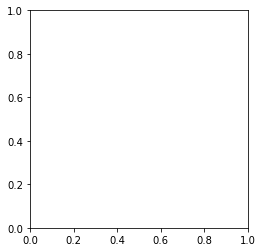

In [99]:
show(vec)